Exercise 1: Combine the two files from the Fitbit project (steps and survey data) into a single csv file, and clean up the variable waist (waist circumference). You will also need these cleaned data for Assignment 1. See Canvas for the data.

In [4]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv("survey_data.csv")
df1.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


<b>1.1: Different world regions use different encodings. How do you see this in the files? Look in the documentation of pd.read_csv() to load both files correctly. </b>

For the steps dataset the delimiter needs to be defined for pd.read_csv as they used a different encoding. The right delimiter is: ';'.

In [5]:
df2 = pd.read_csv("steps_data.csv", delimiter=";")
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>1.2: Which variable is the key to combine both files?</b>

The variable to merge both datasets into one file is 'id'.

In [6]:
df = pd.merge(df1, df2, on = 'id') 
df.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>1.3: Are all values of waist plausible? What are you going to do about this?</b>

First we'll check the values using value_counts(), then we'll write a function that removes the incorrect values.

In [7]:
df['waist'].value_counts()

90.0     46
80.0     46
84.0     35
83.0     32
82.0     30
75.0     30
85.0     29
95.0     28
92.0     28
87.0     28
88.0     28
70.0     26
100.0    26
86.0     25
89.0     24
76.0     23
93.0     22
78.0     22
73.0     21
77.0     18
98.0     18
97.0     16
91.0     16
74.0     15
81.0     14
65.0     14
105.0    14
72.0     14
110.0    14
99.0     14
         ..
63.0      2
125.0     2
61.0      2
64.0      2
122.0     2
115.0     2
132.0     2
58.0      2
41.0      2
117.0     1
0.0       1
116.0     1
173.0     1
175.0     1
119.0     1
27.0      1
44.0      1
130.0     1
55.0      1
56.0      1
46.0      1
49.0      1
48.0      1
172.0     1
53.0      1
131.0     1
36.0      1
39.0      1
35.0      1
147.0     1
Name: waist, Length: 85, dtype: int64

In [8]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

#To remove the values below 30 we need to create a function that we then apply to the entire column
def below_30(x):
    if(x < 30.0): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(below_30)

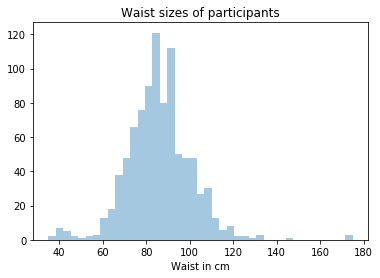

In [9]:
sns.distplot(df['waist'].dropna(), kde=False) #Selecting the waist column. I need to drop the NA's for the plot with dropna
plt.title('Waist sizes of participants')
plt.xlabel('Waist in cm')
plt.show()